<a href="https://colab.research.google.com/github/swathivenkatesan87/24ADI003_24BAD122-EXP-3/blob/main/Exp_3_24BAD122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Swathi
Roll No: 24BAD122
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders 

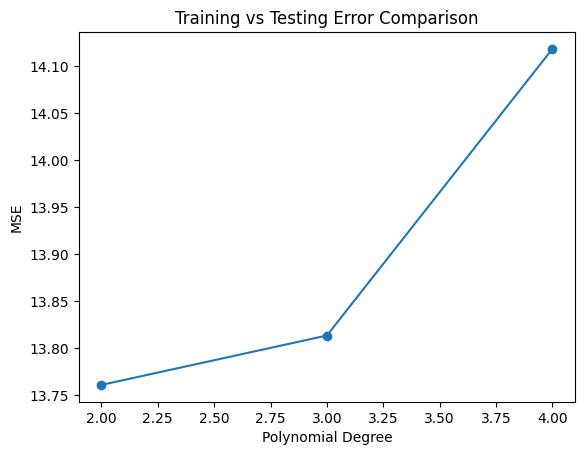


Ridge Regression R2: 0.7393719439438626


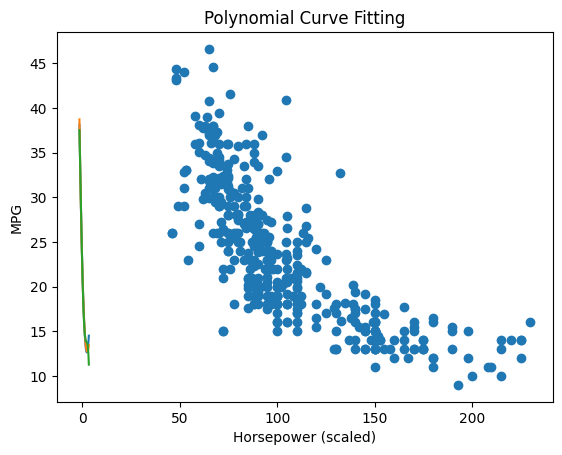

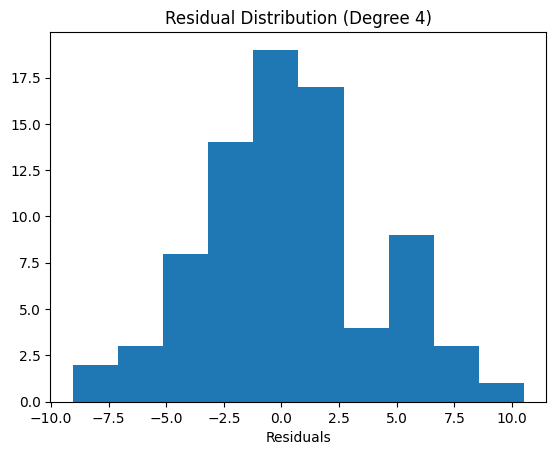

In [4]:
# -----------------------------------------------------------
# SCENARIO 2 – POLYNOMIAL REGRESSION
# Name : SWATHI
# Roll No : 24BAD122
# Problem: Predict Fuel Efficiency using Polynomial Regression
# -----------------------------------------------------------

# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

print("Name: Swathi")
print("Roll No: 24BAD122")
# 2. Load Dataset
# Download auto-mpg.csv from Kaggle and place in same folder

data = pd.read_csv("auto-mpg.csv")

print(data.head())
print(data.info())

# 3. Select horsepower as independent variable


# Convert horsepower to numeric (some values may be '?')
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')

# 4. Handle missing values

data.fillna(data.mean(numeric_only=True), inplace=True)

X = data[["horsepower"]]
y = data["mpg"]


# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split dataset

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Function to train polynomial model

def train_poly(degree):

    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return model, poly, y_pred, mse, rmse, r2


# 7–10 Train models for degrees 2,3,4


results = {}

for degree in [2, 3, 4]:
    model, poly, y_pred, mse, rmse, r2 = train_poly(degree)

    results[degree] = {
        "model": model,
        "poly": poly,
        "pred": y_pred,
        "mse": mse,
        "rmse": rmse,
        "r2": r2
    }

    print("\nDegree:", degree)
    print("MSE :", mse)
    print("RMSE :", rmse)
    print("R2 :", r2)


# 11. Compare model performance

degrees = [2,3,4]
errors = [results[d]["mse"] for d in degrees]

plt.figure()
plt.plot(degrees, errors, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error Comparison")
plt.show()


# 12. Ridge Regression (Overfitting control)


poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

ridge_pred = ridge.predict(X_test_poly)

print("\nRidge Regression R2:",
      r2_score(y_test, ridge_pred))




plt.figure()

plt.scatter(X, y)

# Sort for smooth curve
X_range = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1,1)

for degree in [2,3,4]:
    poly = results[degree]["poly"]
    model = results[degree]["model"]

    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred)

plt.xlabel("Horsepower (scaled)")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting")
plt.show()

# Overfitting demonstration (Residual Plot)

residuals = y_test - results[4]["pred"]

plt.figure()
plt.hist(residuals)
plt.title("Residual Distribution (Degree 4)")
plt.xlabel("Residuals")
plt.show()